In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
mnist = tf.keras.datasets.mnist



In [19]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

- Why do we divide by 255?
- Data shape is 60000 x 28 x 28. 

In [20]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [21]:
x_train.shape

(60000, 28, 28)

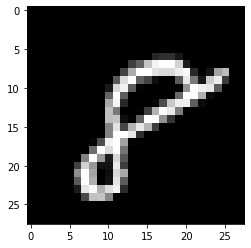

In [22]:
plt.imshow(x_train[59999], cmap=plt.get_cmap('gray'))

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


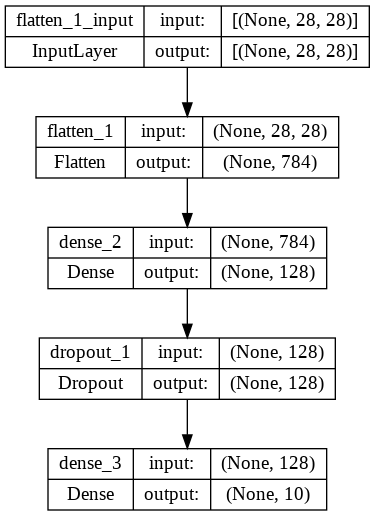

In [24]:
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)

In [26]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.5058338 ,  0.1591431 ,  0.53623545,  0.43470174,  0.08047134,
         0.16879688, -0.17060375,  0.04235603, -0.39619395,  1.0213692 ]],
      dtype=float32)

In [27]:
tf.nn.softmax(predictions).numpy()

array([[0.12114685, 0.08565373, 0.12488647, 0.11282876, 0.07917345,
        0.08648461, 0.06159409, 0.07621251, 0.04915486, 0.20286462]],
      dtype=float32)

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [42]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0667 - accuracy: 0.9786
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0573 - accuracy: 0.9812
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0511 - accuracy: 0.9831
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9839
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0455 - accuracy: 0.9848
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9859
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9873
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372 - accuracy: 0.9875
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0329 - accuracy: 0.9883
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.031

In [43]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0902 - accuracy: 0.9807 - 612ms/epoch - 2ms/step


[0.0902026817202568, 0.9807000160217285]

[[0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.2]]


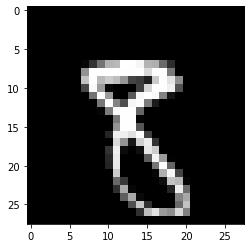

In [44]:
num = 2004
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(tf.nn.softmax(model(x_test[num:num+1])).numpy(),1))

## Keras Functional API

In [45]:
parameters = {"shape":28, "activation": "relu", "classes": 10, "units":12, "optimizer":"adam", "epochs":1,"kernel_size":3,"pool_size":2, "dropout":0.5}

inputs = tf.keras.Input(shape=(parameters["shape"], parameters["shape"]))
flatten = tf.keras.layers.Flatten()(inputs)
dense = tf.keras.layers.Dense(128, activation='relu')(flatten)
dropout =  tf.keras.layers.Dropout(0.2)(dense)
outputs = tf.keras.layers.Dense(parameters["classes"], activation="softmax")(dropout)

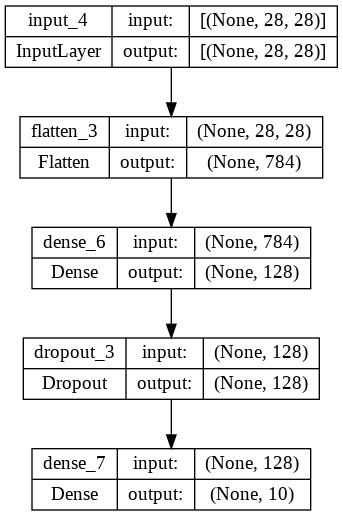

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
tf.keras.utils.plot_model(model, "model.png",show_shapes=True)


In [46]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, epochs=5)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0181 - accuracy: 0.9938
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9946
313/313 - 1s - loss: 0.1115 - accuracy: 0.9822 - 558ms/epoch - 2ms/step
Test loss: 0.11148983240127563
Test accuracy: 0.982200026512146


In [47]:
history.history

{'loss': [0.018108097836375237,
  0.017707090824842453,
  0.018879085779190063,
  0.01828291080892086,
  0.017515145242214203],
 'accuracy': [0.9938499927520752,
  0.9942499995231628,
  0.9939333200454712,
  0.9945666790008545,
  0.9945833086967468]}

[[0.  0.  0.  0.7 0.  0.  0.  0.  0.  0.3]]


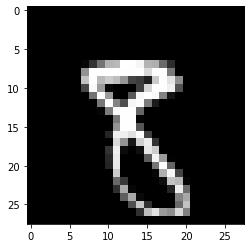

In [48]:
num = 2004
plt.imshow(x_test[num], cmap=plt.get_cmap('gray'))
print(np.round(tf.nn.softmax(model(x_test[num:num+1])).numpy(),1))